# [전처리 실습]

* 도미 데이터를 넣어보면 당연히 도미가 나오겠죠?
* 도미 데이터
    - 길이: 25, 무게:150


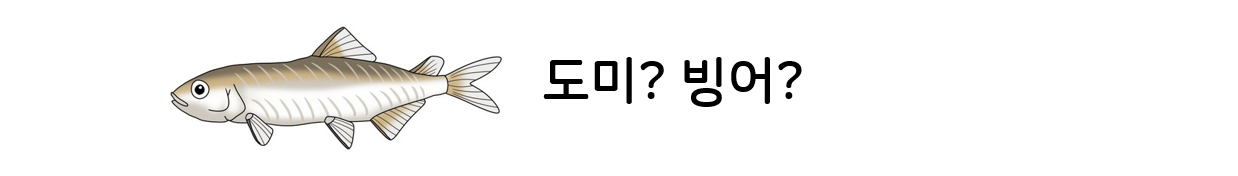

In [1]:
import pandas as pd

In [2]:
#측정한 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

#데이터 프레임으로 만들기
fish_df = pd.DataFrame(fish_data,columns=['길이','무게'])
fish_df['Label'] = fish_target

In [3]:
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.neighbors import KNeighborsClassifier # 분류 알고리즘

#피쳐와 라벨 데이터 준비
label = fish_df['Label']
feature = fish_df.drop('Label',axis=1)

#학습/테스트 데이터 세트 준비
X_train,X_test, y_train,y_test = train_test_split(feature ,label,test_size=0.2, random_state=11)

#모델 학습
kn = KNeighborsClassifier()
kn =kn.fit(X_train,y_train)

#모델 예측
pred = kn.predict(X_test)

#모델 평가
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) 

예측 정확도: 1.0000


---

In [4]:
# 새로운 데이터 예측
# 1: 도미, 0: 빙어

kn.predict([[25,150]])

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

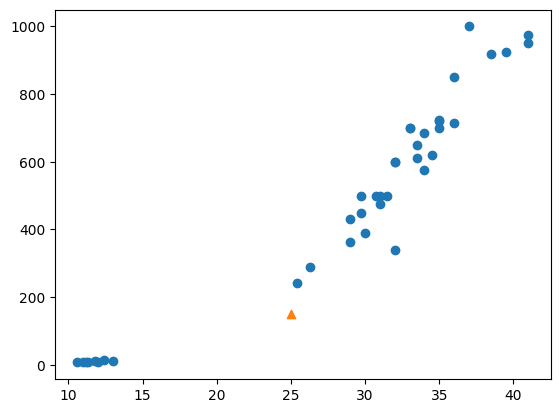

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_train['길이'],X_train['무게'])
plt.scatter(25,150,marker='^')
plt.show()
#스케터 차트그리기

> * 분명히 새로운 데이터는 도미쪽에 가까우나,
> * 모델의 판단은 빙어라고 판단했는데 왜 이런 현상이 벌어질까요?

In [6]:
dist, indexes = kn.kneighbors([[25,150]])

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [7]:
indexes

array([[ 8, 17, 14, 23, 19]], dtype=int64)

In [9]:
idx = indexes.tolist()[0]
idx

[8, 17, 14, 23, 19]

In [12]:
kne = X_train.iloc[idx]
kne

,길이,무게
0,25.4,242.0
45,12.4,13.4
46,13.0,12.2
1,26.3,290.0
41,11.8,10.0


In [13]:
y_train.iloc[idx] 
# K-최근접 모델이 훈련하고, 새로운 데이터에 대해서 최근접 이웃인 5개 데이터를 바탕으로 판단한 결과
# 도미가 2마리, 빙어가 3마리가 있어서 다수결에 따라 빙어로 판단함.

0     1
45    0
46    0
1     1
41    0
Name: Label, dtype: int64

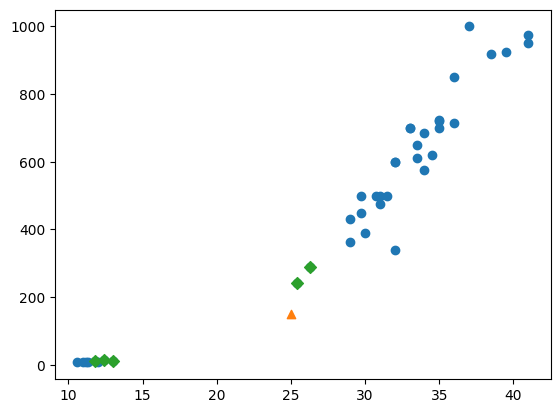

In [14]:
plt.scatter(X_train['길이'],X_train['무게']) # 훈련데이터
plt.scatter(25,150,marker='^')              # 새로운 데이터
plt.scatter(kne['길이'],kne['무게'],marker='D') # 근접 이웃인 데이터 5개
plt.show()

> * X축의 범위는 10~40이고, y축의 범위는 0~1000사이 입니다.
> * 스케일이 다르니 y축으로 조금만 이동을 해도 거리가 아주 큰 값으로 계산됩니다.
> * 따라서, 각 축의 범위를 동일하게 맞춰줘야 합니다.

## StandardScaler 적용

In [30]:
from tkinter import Scale
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
Scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.
Scaler.fit(X_train)
X_train_scaled = Scaler.transform(X_train)
X_train_scaled

array([[-1.95061423, -1.59841597],
       [ 0.34652509,  0.34651717],
       [ 0.20697924,  0.01853519],
       [ 0.61488249,  0.41211356],
       [ 1.04425432,  1.3960595 ],
       [ 0.88323988,  1.65844508],
       [ 0.50753953,  0.51050816],
       [ 0.34652509,  0.34651717],
       [-0.36193844, -0.82765832],
       [-1.90767704, -1.58956046],
       [-1.87547416, -1.59284028],
       [ 0.23918213,  0.01853519],
       [ 0.09963628,  0.01853519],
       [ 0.02449621, -0.43080013],
       [-1.69299113, -1.58136091],
       [ 0.66855397,  0.74009554],
       [-1.88620845, -1.58923248],
       [-1.7573969 , -1.57742513],
       [ 0.56121101,  0.26452167],
       [-1.82180268, -1.58857651],
       [ 0.56121101,  0.62530185],
       [ 0.09963628, -0.1454558 ],
       [ 0.23918213, -0.06346031],
       [-0.26532977, -0.67022697],
       [-1.80033408, -1.58923248],
       [ 1.31261172,  1.4944541 ],
       [ 0.02449621, -0.2110522 ],
       [ 1.15159728,  1.4124586 ],
       [ 0.77589692,

In [31]:
#StandardScaler 적용한 Dataframe 생성
X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns=['길이','무게'])
X_train_scaled_df.head()

,길이,무게
0,-1.950614,-1.598416
1,0.346525,0.346517
2,0.206979,0.018535
3,0.614882,0.412114
4,1.044254,1.396060


In [32]:
#모델 학습
kn = KNeighborsClassifier()
kn =kn.fit(X_train_scaled_df,y_train)


In [33]:
#모델 예측
# 새로운 데이터에 대해서 학습시 적용한 전처리 방법 그대로 적용
scaled = Scaler.transform([[25,150]])

kn.predict([[25,150]])

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
from tkinter import Scale
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
Scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.
Scaler.fit(X_train)
X_train_scaled = Scaler.transform(X_train)

#StandardScaler 적용한 Dataframe 생성
X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns=['길이','무게'])

#모델 학습
kn = KNeighborsClassifier()
kn =kn.fit(X_train_scaled_df,y_train)

#모델 예측
# 새로운 데이터에 대해서 학습시 적용한 전처리 방법 그대로 적용
scaled = Scaler.transform([[25,150]])

kn.predict([[25,150]])

In [34]:
type(scaled)

numpy.ndarray

In [35]:
from sklearn.preprocessing import StandardScaler
#피쳐와 라벨 데이터 준비
label = fish_df['Label']
feature = fish_df.drop('Label',axis=1)
#학습/테스트 데이터 세트 준비
X_train,X_test, y_train,y_test = train_test_split(feature ,label,test_size=0.2, random_state=11)
# 전처리 - StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns=['길이','무게'])
#모델 학습
kn = KNeighborsClassifier()
kn =kn.fit(X_train_scaled_df,y_train)
#새로운 데이터 전처리 적용
scaled = scaler.transform([[25,150]])
## 너무너무너무 중요한 부분!!!!! 새로운 데이터에 대해서 학습시 적용한 전처리 방법 그대로 적용
#모델 예측 25,150
kn.predict(scaled)

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)